<a href="https://colab.research.google.com/github/Adityajl/Wallet-Scoring/blob/master/Wallet_Risk_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import requests
import pandas as pd

# Wallet to test
wallet_address = "0x0039f22efb07a647557c7c5d17854cfd6d489ef3"
ETHERSCAN_API_KEY = "29545WZWUIWJEV48W6M1CABDPZ4V592KIH"

# Etherscan API URL to fetch normal transactions
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={wallet_address}&startblock=0&endblock=99999999&sort=asc&apikey={ETHERSCAN_API_KEY}"

# Send request
response = requests.get(url)
data = response.json()

# Check status
if data["status"] != "1":
    print("Error:", data["message"])
else:
    tx_df = pd.DataFrame(data["result"])
    print(f"Total transactions found: {len(tx_df)}")
    display(tx_df.head())


Total transactions found: 1946


,blockNumber,blockHash,timeStamp,hash,nonce,transactionIndex,from,to,value,gas,gasPrice,input,methodId,functionName,contractAddress,cumulativeGasUsed,txreceipt_status,gasUsed,confirmations,isError
0,3606695,0x3933a1503dfd71252ed989c8137cd888dc6f460a0eee...,1493254201,0x9da9da95c9c48d82a818d60e13c14981264bb8b8418b...,289758,37,0x32be343b94f860124dc4fee278fdcbd38c102d88,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,200000000000000000,333333,30000000000,0x,0x,,,962090,,21000,19395756,0
1,3606709,0xb6de24eb2bfbcbcf439647755ae5382b09cef95769f7...,1493254443,0x48154e11e7844969545339b8328748bf05c49841674e...,0,71,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,7000000000000000,27961,20000000000,0x338cdca1,0x338cdca1,request(),,2094834,,23301,19395742,0
2,3606713,0x2b96e45695f1db42ce79ad0433a282d35d14caaff35b...,1493254495,0xe17bf3ca4d4616c89c3cefba65077420eecac2e115fd...,1,22,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,7000000000000000,27961,20000000000,0x338cdca1,0x338cdca1,request(),,2683717,,23301,19395738,0
3,3606717,0xf5b41d0a8d0617b1d4b2bdbbdcb5bde641b93d9e7081...,1493254558,0xaf10622c370d28f2e1f2631efbc02c35e296a7d6dbd1...,2,22,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x9ae98746eb8a0aeee5ff2b6b15875313a986f103,0,61078,20000000000,0x797af6271f6c8b760228ef69a00bea01f72146a5e5ce...,0x797af627,confirm(bytes32 _h),,752334,,35898,19395734,0
4,3622170,0x2849e6679136438e43daf9484c7a1b15d5159cda01a6...,1493490509,0x42e2cf2103643a349594a0135d5842e02f643ba578e7...,3,115,0x0039f22efb07a647557c7c5d17854cfd6d489ef3,0x0b8d56c26d8cf16fe1bddf4967753503d974de06,20000000000000000,120763,20000000000,0x29cbdc860000000000000000000000000039f22efb07...,0x29cbdc86,"buyin(address _who, uint256 _maxPrice)",,2981051,,100636,19380281,0


In [16]:
# Known Compound V2 contract addresses (mainnet)
compound_contracts = {
    "cETH": "0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5",
    "cUSDC": "0x39aa39c021dfbae8fac545936693ac917d5e7563",
    "cDAI": "0x5d3a536e4d6dbd6114cc1ead35777bab948e3643",
    "Comptroller": "0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b",
    "cWBTC": "0xccf4429db6322d5c611ee964527d42e5d685dd6a"
}

# Normalize addresses to lowercase
compound_addresses = set([addr.lower() for addr in compound_contracts.values()])

# Filter transactions where 'to' is a known Compound contract
compound_txs = tx_df[tx_df["to"].str.lower().isin(compound_addresses)]

print(f"🔍 Found {len(compound_txs)} Compound-related transactions.")
compound_txs = compound_txs.sort_values("timeStamp", ascending=True)
display(compound_txs[["hash", "to", "value", "input", "timeStamp"]].head())


🔍 Found 22 Compound-related transactions.


,hash,to,value,input,timeStamp
750,0x1c61798644a09960097e8d16570248b3e899e5437ca3...,0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b,0,0xc2998238000000000000000000000000000000000000...,1567451347
756,0x3703dbfc7075fda1f753b6813dd80b27298af7063590...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,100000000000000000000,0x1249c58b,1567452519
757,0xcac4ca8b91a33e216c1c94f6fcc8482ef512a185bcc5...,0x39aa39c021dfbae8fac545936693ac917d5e7563,0,0xc5ebeaec000000000000000000000000000000000000...,1567452595
769,0x4222b4ec01ba08cbc4d02b349a76dc468ecb64a108f9...,0x39aa39c021dfbae8fac545936693ac917d5e7563,0,0x0e752702ffffffffffffffffffffffffffffffffffff...,1568440161
770,0x54f30f06c66bb76a821fa5bb1f65307650bcc28b6b7f...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,0,0xdb006a75000000000000000000000000000000000000...,1568440263


In [17]:
# Map of known function selectors
func_map = {
    "0xa0712d68": "supply",
    "0xc5ebeaec": "borrow",
    "0x0e752702": "repay",
    "0xdb006a75": "redeem",
    "0xf5e3c462": "liquidate"
}

# Extract function selector
compound_txs["func_selector"] = compound_txs["input"].str[:10]
compound_txs["action"] = compound_txs["func_selector"].map(func_map).fillna("unknown")

# Preview tagged transactions
print("🧠 Decoded function types:")
display(compound_txs[["hash", "to", "action", "value", "timeStamp"]].head(10))


🧠 Decoded function types:


,hash,to,action,value,timeStamp
750,0x1c61798644a09960097e8d16570248b3e899e5437ca3...,0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b,unknown,0,1567451347
756,0x3703dbfc7075fda1f753b6813dd80b27298af7063590...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,unknown,100000000000000000000,1567452519
757,0xcac4ca8b91a33e216c1c94f6fcc8482ef512a185bcc5...,0x39aa39c021dfbae8fac545936693ac917d5e7563,borrow,0,1567452595
769,0x4222b4ec01ba08cbc4d02b349a76dc468ecb64a108f9...,0x39aa39c021dfbae8fac545936693ac917d5e7563,repay,0,1568440161
770,0x54f30f06c66bb76a821fa5bb1f65307650bcc28b6b7f...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,redeem,0,1568440263
1028,0x32caa484d8e47a0aacbd7b91511487e163b8accdbd6e...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,unknown,100000000000000000000,1592872437
1042,0x900d391db2eff42e6b3fa7311934b227de1259f13d7f...,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,redeem,0,1594846450
1332,0x60d625f026853e117176228fe5313a0d3f769b0e9a7c...,0x5d3a536e4d6dbd6114cc1ead35777bab948e3643,supply,0,1601016752
1346,0xce956fd4904e3ee277b7bede5d335c0a2a83825b0a25...,0x5d3a536e4d6dbd6114cc1ead35777bab948e3643,redeem,0,1601235410
1450,0x1efa3f8d31210b8dab87ad6e8123db0e668cf9aeb75e...,0x39aa39c021dfbae8fac545936693ac917d5e7563,supply,0,1611944108


## Feature Extraction per wallet

In [19]:
# Convert value from wei to ETH
compound_txs["value_eth"] = compound_txs["value"].astype(float) / 1e18

# Grouping counts
num_borrow = (compound_txs["action"] == "borrow").sum()
num_repay = (compound_txs["action"] == "repay").sum()
num_supply = (compound_txs["action"] == "supply").sum()

# Total ETH transferred in each type
total_borrow_eth = compound_txs[compound_txs["action"] == "borrow"]["value_eth"].sum()
total_repay_eth = compound_txs[compound_txs["action"] == "repay"]["value_eth"].sum()
total_supply_eth = compound_txs[compound_txs["action"] == "supply"]["value_eth"].sum()

# Risk ratio: how leveraged the user is
risk_ratio = total_borrow_eth / (1 + total_repay_eth + total_supply_eth)  # add 1 to avoid div-by-zero

# Scoring: 0 (safe) to 1000 (risky)
score = min(int(risk_ratio * 250), 1000)  # scale and cap to 1000

# Final features
wallet_score = {
    "wallet_id": wallet_address,
    "num_borrow": num_borrow,
    "num_repay": num_repay,
    "num_supply": num_supply,
    "total_borrow_eth": round(total_borrow_eth, 4),
    "total_repay_eth": round(total_repay_eth, 4),
    "total_supply_eth": round(total_supply_eth, 4),
    "risk_ratio": round(risk_ratio, 3),
    "score": score
}

wallet_score


{'wallet_id': '0x0039f22efb07a647557c7c5d17854cfd6d489ef3',
 'num_borrow': np.int64(1),
 'num_repay': np.int64(1),
 'num_supply': np.int64(4),
 'total_borrow_eth': np.float64(0.0),
 'total_repay_eth': np.float64(0.0),
 'total_supply_eth': np.float64(0.0),
 'risk_ratio': np.float64(0.0),
 'score': 0}

## Looping for every id

In [23]:
import time
from tqdm import tqdm
import pandas as pd
import requests

# Load wallets
wallets_df = pd.read_csv("/content/Wallet id - Sheet1.csv")
wallet_list = wallets_df["wallet_id"].tolist()

ETHERSCAN_API_KEY = "29545WZWUIWJEV48W6M1CABDPZ4V592KIH"

compound_contracts = {
    "cETH": "0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5",
    "cUSDC": "0x39aa39c021dfbae8fac545936693ac917d5e7563",
    "cDAI": "0x5d3a536e4d6dbd6114cc1ead35777bab948e3643",
    "Comptroller": "0x3d9819210a31b4961b30ef54be2aed79b9c9cd3b",
    "cWBTC": "0xccf4429db6322d5c611ee964527d42e5d685dd6a"
}
compound_addresses = set([addr.lower() for addr in compound_contracts.values()])

func_map = {
    "0xa0712d68": "supply",
    "0xc5ebeaec": "borrow",
    "0x0e752702": "repay",
    "0xdb006a75": "redeem",
    "0xf5e3c462": "liquidate"
}

def score_wallet(wallet):
    url = f"https://api.etherscan.io/api?module=account&action=txlist&address={wallet}&startblock=0&endblock=99999999&sort=asc&apikey={ETHERSCAN_API_KEY}"
    r = requests.get(url)
    data = r.json()

    if data["status"] != "1" or "result" not in data:
        return {"wallet_id": wallet, "score": 0}

    df = pd.DataFrame(data["result"])
    df["to"] = df["to"].str.lower()
    df["func_selector"] = df["input"].str[:10]

    df = df[df["to"].isin(compound_addresses)]
    if df.empty:
        return {"wallet_id": wallet, "score": 0}

    df["action"] = df["func_selector"].map(func_map).fillna("unknown")

    # Count activity
    num_borrow = (df["action"] == "borrow").sum()
    num_repay = (df["action"] == "repay").sum()
    num_supply = (df["action"] == "supply").sum()
    total_actions = num_borrow + num_repay + num_supply

    # Score is scaled to activity (you can adjust this logic)
    score = min(1000, total_actions * 100)

    return {
        "wallet_id": wallet,
        "num_borrow": num_borrow,
        "num_repay": num_repay,
        "num_supply": num_supply,
        "total_actions": total_actions,
        "score": score
    }

# Run for all wallets
results = []
for wallet in tqdm(wallet_list):  # ⬅️ Process all wallets
    try:
        result = score_wallet(wallet)
        results.append(result)
        time.sleep(0.25)
    except Exception as e:
        print(f"Error with {wallet[:6]}... {e}")

# Save to CSV
scores_df = pd.DataFrame(results)
scores_df[["wallet_id", "score"]].to_csv("wallet_scores.csv", index=False)

print("✅ Done! Scored all wallets → wallet_scores.csv")


100%|██████████| 103/103 [00:57<00:00,  1.79it/s]

✅ Done! Scored all wallets → wallet_scores.csv


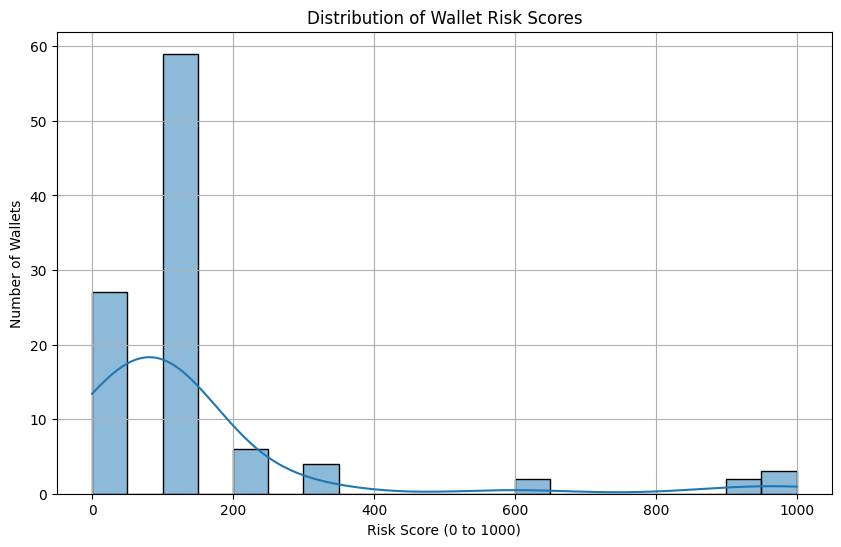

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the scores (if not already loaded)
scores_df = pd.read_csv("wallet_scores.csv")

plt.figure(figsize=(10, 6))
sns.histplot(scores_df["score"], bins=20, kde=True, color="#1f77b4")
plt.title("Distribution of Wallet Risk Scores")
plt.xlabel("Risk Score (0 to 1000)")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()


/tmp/ipython-input-27-2172444275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_risky, x="score", y="wallet_id", palette="Reds_r")


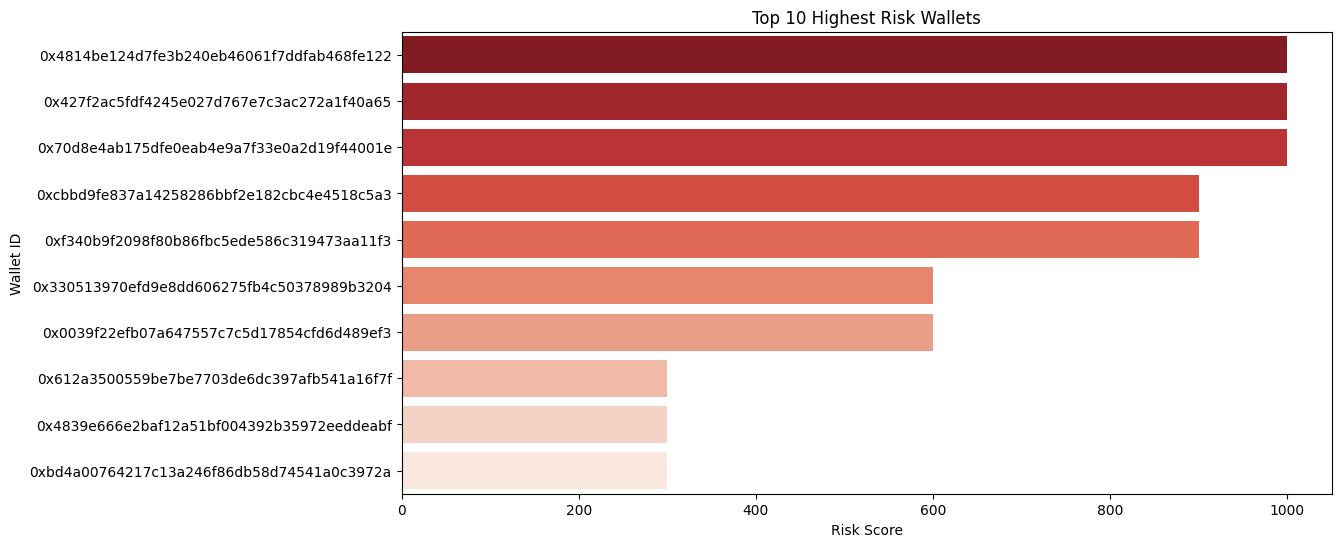

In [27]:
top_risky = scores_df.sort_values("score", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_risky, x="score", y="wallet_id", palette="Reds_r")
plt.title("Top 10 Highest Risk Wallets")
plt.xlabel("Risk Score")
plt.ylabel("Wallet ID")
plt.show()


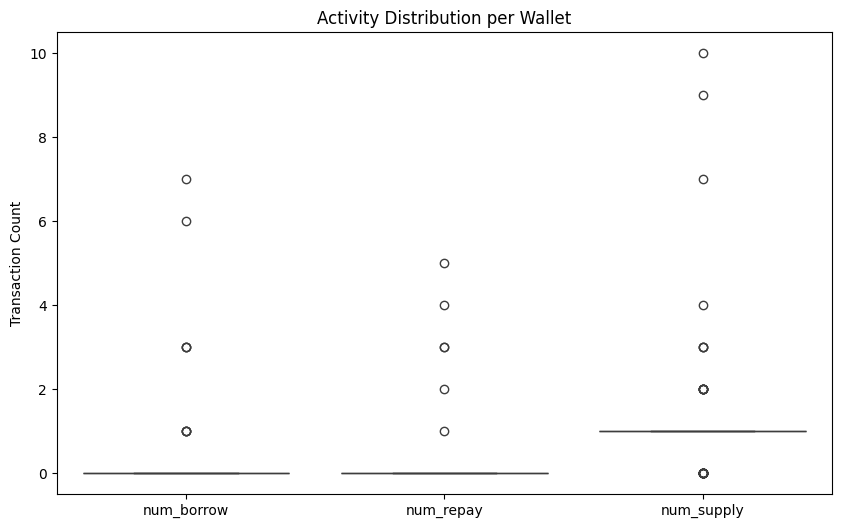

In [29]:
activity_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.boxplot(data=activity_df[["num_borrow", "num_repay", "num_supply"]])
plt.title("Activity Distribution per Wallet")
plt.ylabel("Transaction Count")
plt.show()


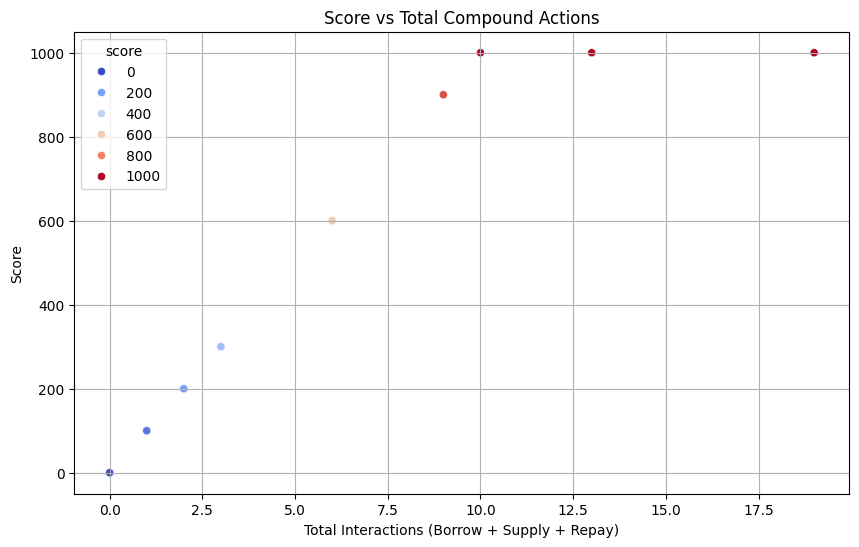

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=activity_df, x="total_actions", y="score", hue="score", palette="coolwarm")
plt.title("Score vs Total Compound Actions")
plt.xlabel("Total Interactions (Borrow + Supply + Repay)")
plt.ylabel("Score")
plt.grid(True)
plt.show()
